In [2]:
import tensorflow as tf
!pip install tensorflow==2.9.1
import tensorflow as tf
print(tf.__version__)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
2.9.1


In [3]:
pip install split_folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import splitfolders

In [6]:
input_folder="/content/drive/MyDrive/dummy_sugarcane"
output="/content/final"
splitfolders.ratio(input_folder,output,seed=42,ratio=(.7,.15,.15))

Copying files: 1500 files [01:24, 17.71 files/s] 


In [7]:
rm -rf `find -type d -name .ipynb_checkpoints`

In [8]:
import tensorflow as tf

In [9]:
from tensorflow.keras.layers import Conv2D,Flatten,Dense,MaxPool2D,BatchNormalization,GlobalAveragePooling2D
from tensorflow.keras.applications.resnet50 import preprocess_input,decode_predictions
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import numpy as np

In [10]:
img_height,img_width=224,224
batch_size=32
train='/content/final/val'
valid='/content/final/train'
test='/content/final/test'

In [11]:
train_ds=tf.keras.preprocessing.image_dataset_from_directory(
    input_folder,
    validation_split=0.2,
    subset='training',
    seed=123,
    label_mode='categorical',
    image_size=(img_height,img_width),
    batch_size=batch_size
)

Found 1500 files belonging to 4 classes.
Using 1200 files for training.


In [12]:
val_ds=tf.keras.preprocessing.image_dataset_from_directory(
    input_folder,
    validation_split=0.2,
    subset='validation',
    seed=123,
    label_mode='categorical',
    image_size=(img_height,img_width),
    batch_size=batch_size
)

Found 1500 files belonging to 4 classes.
Using 300 files for validation.


In [13]:
resnet_model= Sequential()
pretrained_model=tf.keras.applications.ResNet50(include_top=False,input_shape=(224,224,3),pooling='avg',classes=4,weights='imagenet')
for layer in pretrained_model.layers:
  layer.trainable=-False
resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512,activation='relu'))
resnet_model.add(Dense(4,activation='softmax'))

94765736/94765736 [==============================] - 1s 0us/step


In [14]:
resnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dense_1 (Dense)             (None, 4)                 2052      
                                                                 
Total params: 24,638,852
Trainable params: 1,051,140
Non-trainable params: 23,587,712
_________________________________________________________________


In [15]:
from tensorflow.keras.optimizers import Adam

In [16]:
resnet_model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [17]:
epochs=5
history=resnet_model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/5
38/38 [==============================] - 300s 8s/step - loss: 0.5985 - accuracy: 0.7792 - val_loss: 0.2475 - val_accuracy: 0.9067
Epoch 2/5
38/38 [==============================] - 295s 8s/step - loss: 0.1436 - accuracy: 0.9442 - val_loss: 0.1928 - val_accuracy: 0.9200
Epoch 3/5
38/38 [==============================] - 292s 8s/step - loss: 0.1570 - accuracy: 0.9367 - val_loss: 0.1353 - val_accuracy: 0.9533
Epoch 4/5
38/38 [==============================] - 292s 8s/step - loss: 0.0481 - accuracy: 0.9892 - val_loss: 0.0678 - val_accuracy: 0.9800
Epoch 5/5
38/38 [==============================] - 295s 8s/step - loss: 0.0227 - accuracy: 0.9983 - val_loss: 0.0557 - val_accuracy: 0.9733


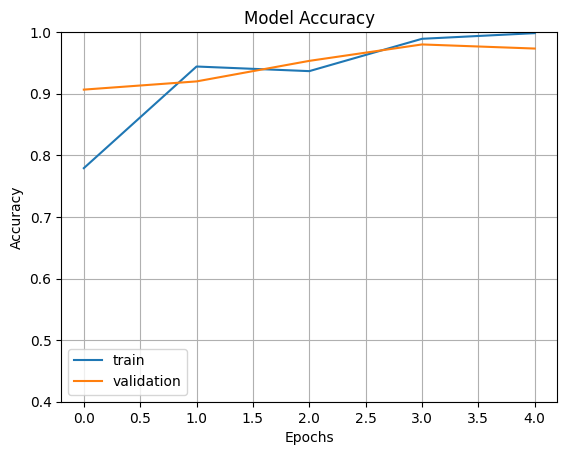

In [18]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [19]:
resnet_model.save('residual50_m')


In [20]:
loaded_1 = tf.keras.models.load_model("residual50_m")

RuntimeError: ignored

In [ ]:
tf.keras.models.save_model(resnet_model,'/content/drive/MyDrive/residual50_m.h5')

In [ ]:
loaded=tf.keras.models.load_model('/content/drive/MyDrive/residual50_m.h5')